<a href="https://colab.research.google.com/github/jsdysw/approaching_almost_any_mlp/blob/master/evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
def accuracy(y_true, y_pred):
  correct_counter = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct_counter += 1
  return correct_counter / len(y_true)

In [60]:
def true_positive(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn

def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp

def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt ==1 and yp == 0:
      fn += 1
  return fn

In [61]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + fp + tn + fn)
  return accuracy_score

In [62]:
def precision(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp / (tp + fp)
  return precision

In [63]:
def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

Precesion-recall graph

In [64]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.0263, 0.1111, 0.3162, 0.0490, 
          0.0191, 0.1755, 0.1595, 0.0381, 
          0.1163, 0.0793, 0.0858, 0.3909, 
          0.2725, 0.0344, 0.0464, 0.0354, 
          0.1852, 0.0593, 0.6197, 0.3305]

In [65]:
precisions = []
recalls = []
thresholds = [0.04, 0.05, 0.07, 
               0.08, 0.11, 0.15, 
               0.17, 0.18, 0.21, 
               0.27, 0.31, 0.33, 
               0.39, 0.61]

for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

Text(0, 0.5, 'Precision')

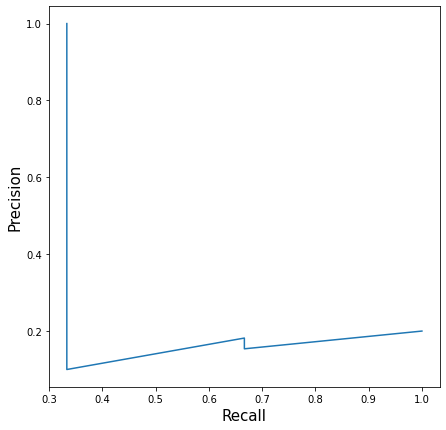

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)